<a href="https://colab.research.google.com/github/KenyJW/AnalisisDatos/blob/AnalisisDatos/ejercicio_pps_7_seleccion_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

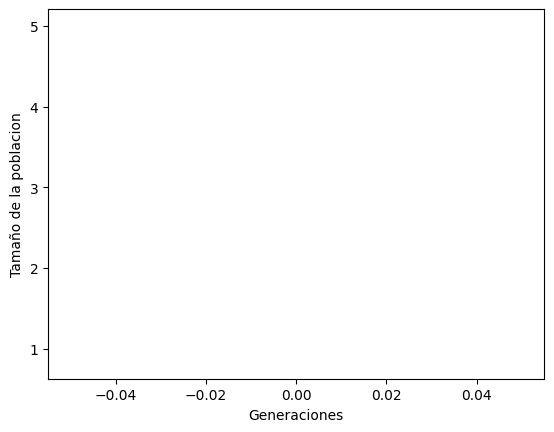

In [55]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

#definimos los parametros de la simulacion
tamano_poblacion = 200
cantidad_alimento = 100
prob_mutacion = 0.01
cantidad_iteraciones = 5

#definimos la clase de los organismos
class Organismo:
  def __init__(self, prob_sobrevivir, velocidad_reproduccion):
    self.prob_sobrevivir = prob_sobrevivir
    self.velocidad_reproduccion = velocidad_reproduccion

  def reproducirse(self):
    if random()<self.velocidad_reproduccion:
      return Organismo(self.prob_sobrevivir, self.velocidad_reproduccion)
    else:
      return None

  def sobrevivir(self, cantidad_alimento):
    prob_sobrevivir_ajustada = self.prob_sobrevivir*(cantidad_alimento/100.0)
    if random()<prob_sobrevivir_ajustada:
      return True
    else:
      return False

#definimos la funcion para mutar un organismo
def mutar_Organismo(Organismo, prob_mutacion):
  if random()<prob_mutacion:
    return Organismo(Organismo.prob_sobrevivir + (random()* 0.2-0.1), Organismo.velocidad_reproduccion + (random()*0.2-0.1))
  else:
    return  Organismo

#creamos poblacion inicial 
poblacion = [Organismo(random(), random()) for i in range(tamano_poblacion)]

#Creamos las listas para almacenar la evolucion de la poblacion
poblacion_tamano = []
poblacion_promedio_sobrevivencia = []
poblacion_promedio_velocidad = []

#ejecutamos la sumilacion
for i in range(cantidad_iteraciones):
  #Calculamos la cantidad de alimento disponible
  cantidad_alimento = 100-i

  #Filtramos los organismos que sobreviven y se reproducen
  poblacion = [Organismo.reproducirse() for Organismo in poblacion if Organismo.sobrevivir(cantidad_alimento)]
  poblacion = [Organismo for Organismo in poblacion if Organismo is not None]

#mutamos algunos organismos al azar
poblacion = [mutar_Organismo(Organismo, prob_mutacion) for Organismo in poblacion]

#Almacenamos la evolucion de la poblacion
poblacion_tamano.append(len(poblacion))
poblacion_promedio_sobrevivencia.append(np.mean([Organismo.prob_sobrevivir for Organismo in poblacion]))

#Graficamos la evolucion de a poblacion
plt.figure()
plt.plot(poblacion_tamano, label='Tamaño de la poblacion')
plt.plot(poblacion_promedio_sobrevivencia, label = 'Probabilidad de sobrevivencia promedio')
plt.plot(poblacion_promedio_velocidad, label = 'Velocidad de reproducion promedio')
plt.xlabel('Generaciones')
plt.ylabel('Tamaño de la poblacion')
plt